# AIRLINE ANALYSIS AND PREDICTION

In [1]:
#Importing required Libraries
import pandas as pd
#for working with dataframes
import numpy as np
# for array operation
import matplotlib.pyplot as plt
#for data visualization
import plotly.express as px
from sklearn.model_selection import train_test_split
# for spiliting the data
from sklearn.metrics import mean_squared_error
#for calculating the cost function
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from scipy import stats as stat

%matplotlib inline
sns.set()

# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


# DATA LOADING AND EXPLORATION 

In [2]:
#Importing CO2 Emissions Data
flight= pd.read_csv(r'C:\Users\MITCHEL\Documents\airlines.csv')
flight.head(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time


In [3]:
flight.tail()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled
98618,8JYEcz,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Auguste Tindley,Delayed


In [4]:
flight.shape

(98619, 15)

In [5]:
flight.isnull()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98615,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98616,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98617,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
flight.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [7]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
flight.nunique()

Passenger ID            98619
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98605
Flight Status               3
dtype: int64

In [9]:
flight.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


# ANALYSIS AND PREDICTION

In [10]:
from seaborn import kdeplot

plt.figure(figsize=(10,8))
kdeplot(flight=flight, x='Age', hue='Gender', color= 'pink')

ValueError: Could not interpret value `Age` for parameter `x`

<Figure size 1000x800 with 0 Axes>

In [ ]:
from seaborn import kdeplot

plt.figure(figsize=(10,8))
kdeplot(flight=flight, x='Passanger ID', hue='Flight Status')

In [ ]:
from matplotlib import style
plt.style.use('ggplot')
values= flight["Gender"].value_counts()
labels= flight["Gender"].unique()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct = '%1.1f%%')

plt.show()

#To obtain our pie chart, we first defined two dataframes:"values" and "labels". the first one records the quantity of genders,and the second one represents the categories which are male and female.
we define our arguements to build our chart, and by using "plt.show",we visualize the results
we can see that the men and the women are close to balance, with a slight majority to the women

# Age of the passengers

In [ ]:
flight["Age"].describe()

#Through "describe," we obtain a series of descriptive statistics where we can observe, for example, that the average age of the passengers is 45 years, with a minimum age of 1 year and a maximum of 90 years.
To clarify which age stands out the most in this dataset, we will group these ages and visualize them.

In [ ]:
bins = [0, 12, 30, 50, 100]
labels = ['Children', 'Youth', 'Adults', 'Seniors']
flight['Age Groups'] = pd.cut(flight['Age'], bins=bins, labels=labels)

#We define the ages in a series of intervals and record them in "bins," adding a category for each corresponding age range, which is stored in "labels." Next, we define a new column for our dataframe called "Age Group," where we will group the ages from our "Age" column based on the defined age intervals ("bins") and assign them to the appropriate category ("labels") using "pd.cut."

In [ ]:
group_counts = flight['Age Groups'].value_counts()

plt.figure(figsize=(8,5))
group_counts.plot(kind='bar', rot=0)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution by Age group")
plt.show()

#In "group_counts," we define the values corresponding to each group in this column. Next, we use "plot" to define our graph, specifying in "kind" that we want a bar chart. We also define the labels on the "x" and "y" axes and set the title. Finally, we use "plt.show" to visualize our results.

We can see that the "Seniors" group has a significant presence in this dataframe, indicating that the majority of people in this database are between 50 and 100 years old.

# FLIGHT STATUS

In [11]:
flight['Flight Status'].value_counts()

Flight Status
Cancelled    32942
On Time      32846
Delayed      32831
Name: count, dtype: int64

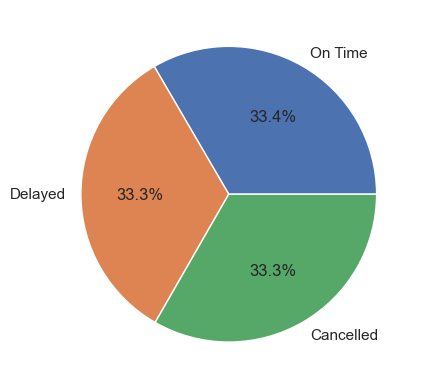

In [12]:
labels = flight['Flight Status'].unique()
values = flight['Flight Status'].value_counts()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct = ('%1.1f%%'))
plt.show()

#For visualizing the flight statuses, we created a pie chart, following the same steps as in the first section, but this time working with the "Flight Status" column. From the results obtained, we can see that the flight statuses: "Cancelled, Delayed, On time," follow a similar distribution, with one flight status not significantly standing out compared to the others.

# Which are the top 5 countries with the most visits?

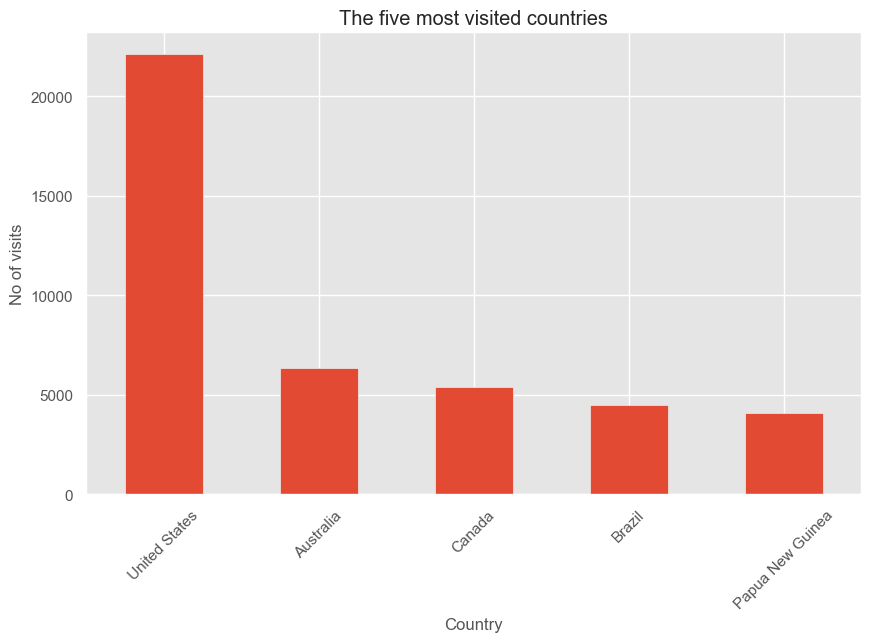

In [17]:
country_visits = flight["Country Name"].value_counts().head(5)

plt.figure(figsize=(10,6))
country_visits.plot(kind='bar')
plt.title('The five most visited countries')
plt.xlabel('Country')
plt.ylabel('No of visits')
plt.xticks(rotation=45)
plt.show()

#To obtain this result, we applied the "value_counts" command to the "Country Name" column, which returns the count for each country in this dataframe. By using "head(5)," we summarized the results to the top five values, sorted from highest to lowest. We included the corresponding code to visualize the results, and we can see that the United States is the country that stands out the most in terms of visits, making it the most visited country.

# Which continent is the most visited?

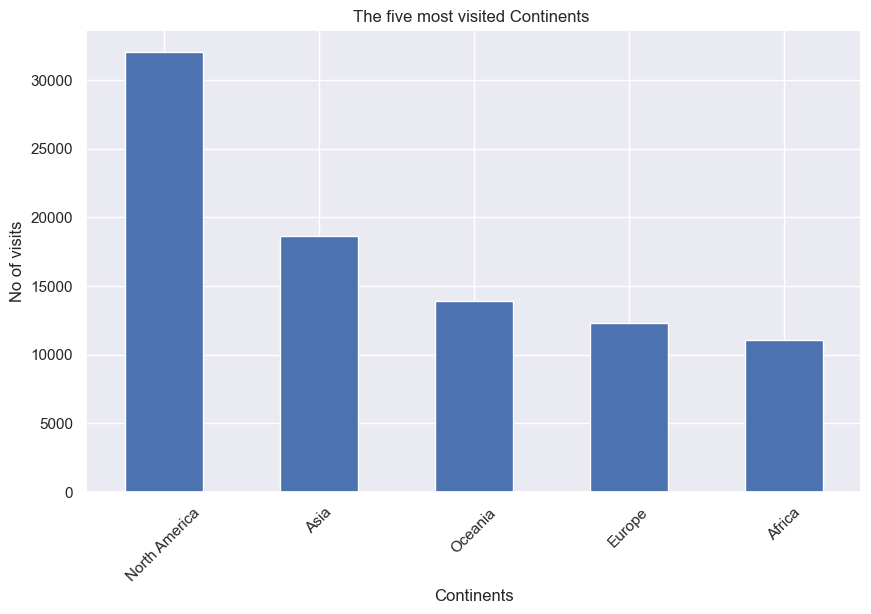

In [13]:
continent_visits = flight["Continents"].value_counts().head(5)

plt.figure(figsize=(10,6))
continent_visits.plot(kind='bar')
plt.title('The five most visited Continents ')
plt.xlabel('Continents')
plt.ylabel('No of visits')
plt.xticks(rotation=45)
plt.show()

#To visualize which continent has the most visits, we followed the same steps as in previous cases, but this time, we worked with the "Continents" column. The results show that North America is the most visited continent, and as we observed earlier, within this region, the United States has the highest number of visits.

In [14]:
flight['Departure Date'] = pd.to_datetime(flight['Departure Date'])

ValueError: time data "06-10-2022" doesn't match format "%m/%d/%Y", at position 5. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<Axes: xlabel='Gender', ylabel='Age'>

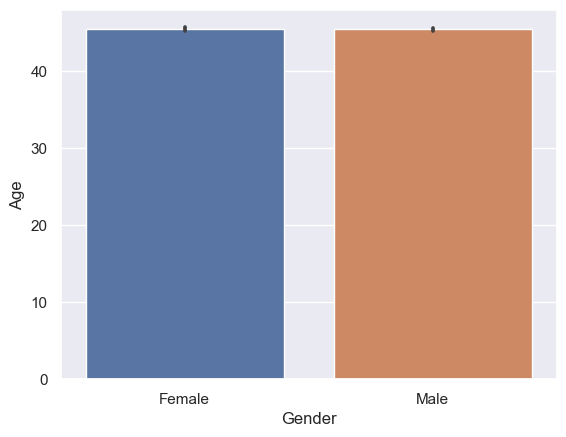

In [15]:
sns.barplot(x='Gender', y='Age', data=flight)

In [16]:
flight['Continents'].value_counts().reset_index().rename(columns={'index': 'Continents','Continents':'count'})

,count,count
0,North America,32033
1,Asia,18637
2,Oceania,13866
3,Europe,12335
4,Africa,11030
5,South America,10718


In [17]:
flight['Nationality'].value_counts().nlargest(10).reset_index().rename(columns={'index': 'Nationality','Nationality':'count'})

,count,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
5,Portugal,3299
6,Poland,3245
7,France,2907
8,Sweden,2397
9,United States,2105


In [18]:
print('The average age of the passengers : ',int(np.mean(flight['Age'])))
print('Number of flights completed without cancellation or Delayed :',flight[flight['Flight Status']=='On Time'].value_counts().sum())
print('Number of delayed flights :',flight[flight['Flight Status']=='Delayed'].value_counts().sum())
print('Number of flights cancelled :',flight[flight['Flight Status']=='Cancelled'].value_counts().sum())

The average age of the passengers :  45
Number of flights completed without cancellation or Delayed : 32846
Number of delayed flights : 32831
Number of flights cancelled : 32942


In [19]:
overall_time_performance =flight[flight['Flight Status'].str.contains('On Time',case=True)]
print('overall_time_performance = ',(overall_time_performance['Flight Status'].value_counts().sum()/flight['Flight Status'].value_counts().sum())*100)

overall_time_performance =  33.30595524189051


In [21]:
flight.loc[flight['Flight Status'] == 'On Time', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count'})

,count,count
0,San Pedro Airport,17
1,Santa Ana Airport,15
2,Mercer County Airport,13
3,OR Tambo International Airport,13
4,Böblingen Flugfeld,13


In [22]:
flight.loc[flight['Flight Status'] == 'On Time', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count'})

,count,count
0,San Pedro Airport,17
1,Santa Ana Airport,15
2,Mercer County Airport,13
3,OR Tambo International Airport,13
4,Böblingen Flugfeld,13


In [24]:
print('Number of pilot: ',flight['Pilot Name'].value_counts().sum()).

Number of pilot:  98619


In [26]:
flight['Airport Name'].nunique()

9062

In [27]:
print('Most day of the year flights \n')
flight['Departure Date'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Departure Date','Departure Date':'count'})

Most day of the year flights 



,count,count
0,7/22/2022,325
1,5/26/2022,314
2,10/16/2022,310
3,8/15/2022,310
4,11/25/2022,310


In [28]:
month_counts = flight['Departure Date'].dt.month.value_counts().nlargest(1).index[0]
print('The month with the most flights:', month_counts)

day_month_counts = flight['Departure Date'].dt.day.value_counts().nlargest(1).index[0]
print('The day of the month with the most flights:', day_month_counts)

most_flights_day_week = flight['Departure Date'].dt.day_of_week.value_counts().nlargest(1).index[0]
weekday_name = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
most_flights_day_name = weekday_name.iloc[most_flights_day_week]
print('The day of the week with the most flights:', most_flights_day_name)


AttributeError: Can only use .dt accessor with datetimelike values

In [30]:
plt.figure(figsize=(9, 6))
sns.countplot(x=flight['Departure Date'].dt.month)
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Distribution of Flights by Month')
plt.show()

plt.figure(figsize=(9, 6))
sns.countplot(x=flight['Departure Date'].dt.day)
plt.xlabel('Day of the Month')
plt.ylabel('Flight Count')
plt.title('Distribution of Flights by Day of the Month')
plt.show()

plt.figure(figsize=(9, 6))
sns.countplot(x=flight['Departure Date'].dt.day_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('Flight Count')
plt.title('Distribution of Flights by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 900x600 with 0 Axes>

In [ ]:
sns.jointplot(x=df['Departure Date'].dt.month,y=df['Departure Date'].dt.day,data=df,kind='reg')
plt.show()

now encoding to get more analysis

In [ ]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month

In [ ]:
features = ['Airport Name','Airport Country Code','Country Name','Airport Continent','Continents','Arrival Airport','Day_of_Week', 'Month']
x = df[features].copy()
label_encoders = {}
for feature in features:
    le = LabelEncoder()
    x.loc[:, feature] = le.fit_transform(x[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['Flight Status'].apply(lambda x: 1 if x == 'Delayed' else 0)

In [ ]:
print('x_shape : ',x.shape,'\ny_shape : ',y.shape)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train)

In [ ]:
x_train = scaler.fit_transform(x_train)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

In [ ]:
y_pred_1=lin_reg.predict(poly_reg.fit_transform(x_test))

In [ ]:
y_pred_2=log_reg.predict(x_test)

In [ ]:
#Accuracy of polynomial regression
mse = mean_squared_error(y_test, y_pred_1)
rmse = mean_squared_error(y_test, y_pred_1, squared=False)
mae = mean_absolute_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

In [ ]:
plt.title('confusion_matrix of logistic model')
cm=confusion_matrix(y_test,y_pred_2)
sns.heatmap(cm,cmap='Spectral',annot=True,linewidths=1)
plt.show()

In [ ]:
#Accuracy of logistic model
print(classification_report(y_test,y_pred_2))
print('Accuracy = ',accuracy_score(y_test,y_pred_2))